# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Stored in directory: /Users/trevordoucet/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []       

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Empty lists 
city_two = []
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []


# loops for creating dataframe columns
i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | torbay
Processing Record 2 | nambucca heads
Processing Record 3 | atuona
Processing Record 4 | bikaner
Processing Record 5 | cape town
Processing Record 6 | rovaniemi
Processing Record 7 | luderitz
Processing Record 8 | butaritari
City not found. Skipping...
Processing Record 10 | port macquarie
Processing Record 11 | kulhudhuffushi
Processing Record 12 | maniitsoq
Processing Record 13 | port blair
Processing Record 14 | bethel
Processing Record 15 | saskylakh
Processing Record 16 | rikitea
Processing Record 17 | ramygala
City not found. Skipping...
Processing Record 19 | jam sahib
Processing Record 20 | qaanaaq
Processing Record 21 | mount gambier
Processing Record 22 | ushuaia
Processing Record 23 | ranong
Processing Record 24 | punta arenas
Processing Record 25 | vaini
Processing Record 26 | albany
Processing Record 27 | barrow
Processing Record 28 | mangrol
Processing Record 29 | mweka
Processing Record 3

Processing Record 254 | jacareacanga
City not found. Skipping...
Processing Record 256 | kupang
Processing Record 257 | marsh harbour
Processing Record 258 | nanortalik
Processing Record 259 | aykhal
Processing Record 260 | chicama
Processing Record 261 | xuanhua
Processing Record 262 | batagay
Processing Record 263 | palmer
Processing Record 264 | tevaitoa
Processing Record 265 | lagoa
Processing Record 266 | elat
Processing Record 267 | cubarral
Processing Record 268 | nova soure
Processing Record 269 | creemore
Processing Record 270 | penzance
Processing Record 271 | beidao
Processing Record 272 | nome
City not found. Skipping...
Processing Record 274 | labuhan
Processing Record 275 | russell
City not found. Skipping...
Processing Record 277 | hofn
Processing Record 278 | san cristobal
Processing Record 279 | nouadhibou
Processing Record 280 | hasaki
City not found. Skipping...
Processing Record 282 | tautira
Processing Record 283 | flinders
Processing Record 284 | yulara
Processing

Processing Record 504 | muli
Processing Record 505 | caravelas
Processing Record 506 | kismayo
Processing Record 507 | princeton
Processing Record 508 | tura
City not found. Skipping...
Processing Record 510 | matagami
Processing Record 511 | lazaro cardenas
City not found. Skipping...
Processing Record 513 | davila
Processing Record 514 | asha
Processing Record 515 | salalah
Processing Record 516 | miri
Processing Record 517 | kigonsera
Processing Record 518 | le port
Processing Record 519 | vilhena
Processing Record 520 | christchurch
Processing Record 521 | port hedland
Processing Record 522 | sosnovo-ozerskoye
City not found. Skipping...
Processing Record 524 | igarka
Processing Record 525 | kedrovyy
Processing Record 526 | saurimo
Processing Record 527 | broken hill
Processing Record 528 | svetlaya
Processing Record 529 | karpathos
Processing Record 530 | grindavik
Processing Record 531 | camacha
Processing Record 532 | thunder bay
City not found. Skipping...
City not found. Skipp

In [28]:
#Empty list
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for resp in responses:
    city.append(resp['name'])
    cloudiness.append(resp['clouds']['all'])
    country.append(resp['sys']['country'])
    date.append(resp['dt'])
    humidity.append(resp['main']['humidity'])
    lat.append(resp['coord']['lat'])
    lng.append(resp['coord']['lon'])
    max_temp.append(resp['main']['temp_max'])
    wind_speed.append(resp['wind']['speed'])

In [29]:
citydata = {
    'City': city,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
}

citydata_df = pd.DataFrame(citydata)

citydata_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,75,CA,1590272753,72,47.67,-52.73,43.00,16.11
1,Nambucca Heads,75,AU,1590272753,87,-30.65,153.00,57.20,4.70
2,Atuona,4,PF,1590272753,73,-9.80,-139.03,80.42,16.06
3,Bikaner,3,IN,1590272700,20,28.02,73.30,90.39,11.25
4,Cape Town,0,ZA,1590272474,93,-33.93,18.42,59.00,6.93
5,Rovaniemi,2,FI,1590272754,42,66.50,25.72,48.20,6.93
6,Lüderitz,0,NA,1590272754,82,-26.65,15.16,57.20,2.24
7,Butaritari,54,KI,1590272754,78,3.07,172.79,82.80,9.15
8,Port Macquarie,78,AU,1590272754,71,-31.43,152.92,62.01,4.00
9,Kulhudhuffushi,26,MV,1590272755,80,6.62,73.07,83.71,15.14


In [30]:
citydata_df.count()

City          5265
Cloudiness    5265
Country       5265
Date          5265
Humidity      5265
Lat           5265
Lng           5265
Max Temp      5265
Wind Speed    5265
dtype: int64

In [31]:
citydata_df.to_csv("../output_data/output_data_file")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

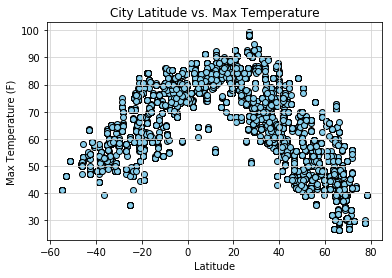

In [32]:
plt.scatter(citydata_df["Lat"],citydata_df["Max Temp"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Lat_Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

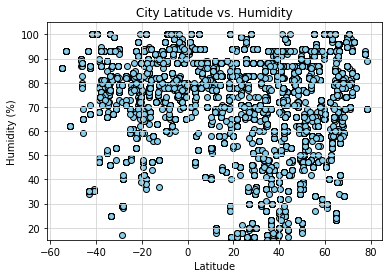

In [33]:
plt.scatter(citydata_df["Lat"],citydata_df["Humidity"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

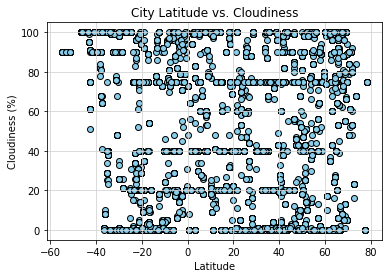

In [34]:
plt.scatter(citydata_df["Lat"],citydata_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

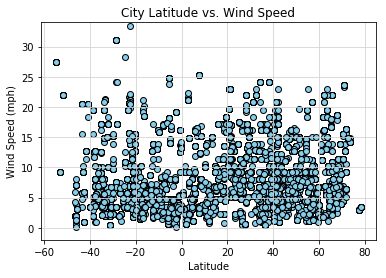

In [35]:
plt.scatter(citydata_df["Lat"],citydata_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/Lat_WindSpeed.png")
plt.show()

## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots

def linreg(df, y_column_name, y_label, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames
n_hemisphere_df = citydata_df.loc[citydata_df['Lat'] > 0, :]
s_hemisphere_df = citydata_df.loc[citydata_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8083875592452984


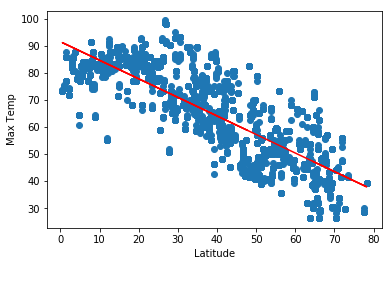

In [38]:

linreg(n_hemisphere_df, 'Max Temp', 'Max Temp', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7441832795879907


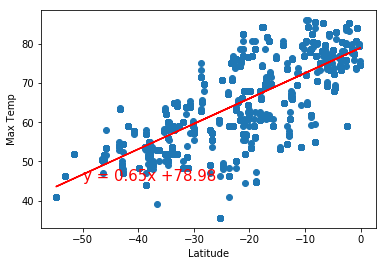

In [39]:

linreg(s_hemisphere_df, 'Max Temp', 'Max Temp', (-50,45))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02893608364623471


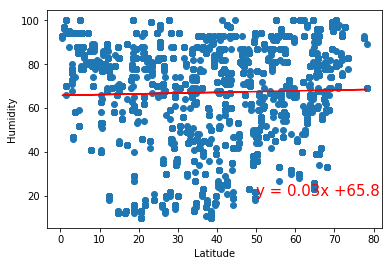

In [40]:
linreg(n_hemisphere_df, 'Humidity', 'Humidity', (50,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16009313666847494


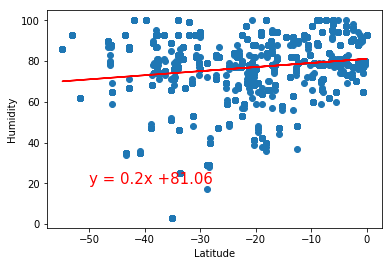

In [41]:

linreg(s_hemisphere_df, 'Humidity', 'Humidity', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06708892730572232


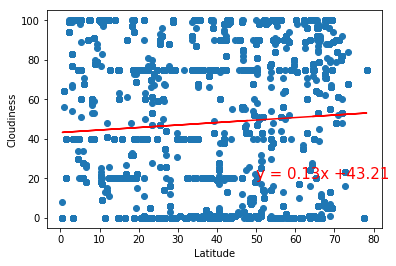

In [42]:
linreg(n_hemisphere_df, 'Cloudiness', 'Cloudiness', (50,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06708892730572232


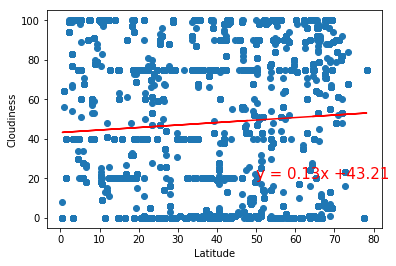

In [43]:
linreg(n_hemisphere_df, 'Cloudiness', 'Cloudiness', (50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.015386886303941291


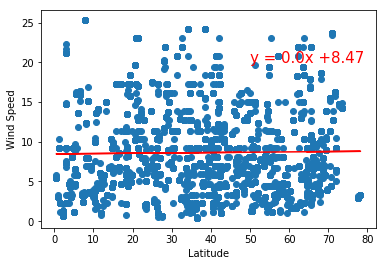

In [44]:
linreg(n_hemisphere_df, 'Wind Speed', 'Wind Speed', (50,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.15868282614701854


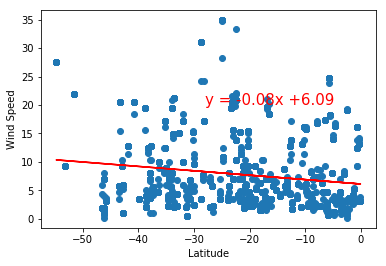

In [45]:
linreg(s_hemisphere_df, 'Wind Speed', 'Wind Speed', (-28,20))